In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
train_data = pd.read_csv('train.csv')


In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


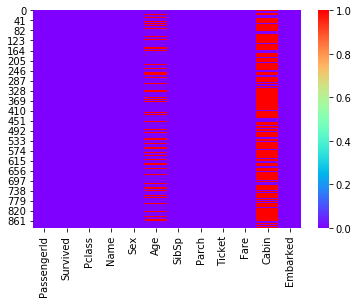

In [62]:
sns.heatmap(train_data.isnull(),cmap='rainbow')

In [63]:
#cabin has too much null values so we are gonna drop this columns
#age column has significant amount of noise but as we can retain this column 
# by filling in the mean values

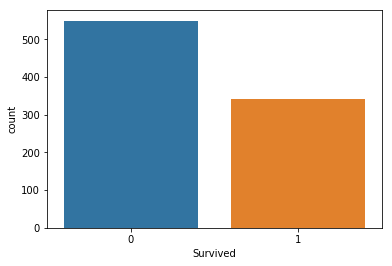

In [64]:
sns.countplot(x='Survived', data=train_data)

In [65]:
#number of people survued are less as compared to other

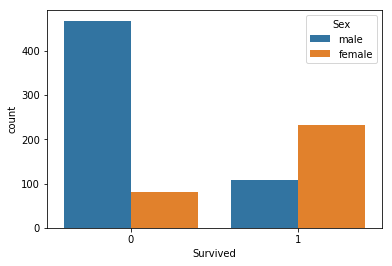

In [66]:
sns.countplot(x='Survived', data=train_data, hue='Sex')

In [67]:
#the number of female survived is more than the males who survived

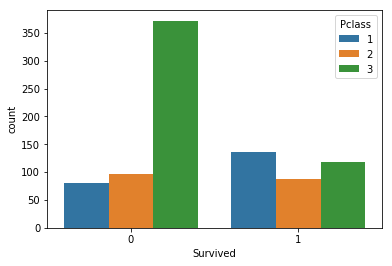

In [68]:
sns.countplot(x='Survived', data=train_data, hue='Pclass')

In [69]:
#the number of people who died in titanic crash are from 3class

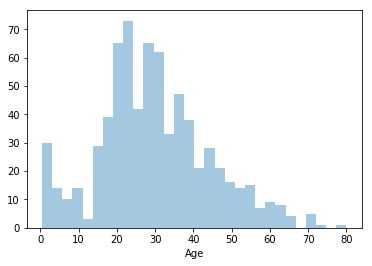

In [70]:
sns.distplot(train_data['Age'].dropna(), kde=False, bins=30)

In [71]:
#there are lot of people of between 30-40 

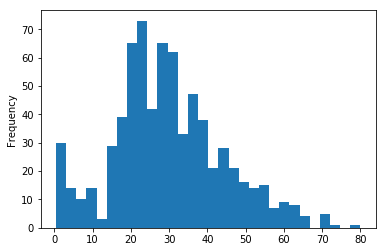

In [72]:
train_data['Age'].plot.hist(bins=30)

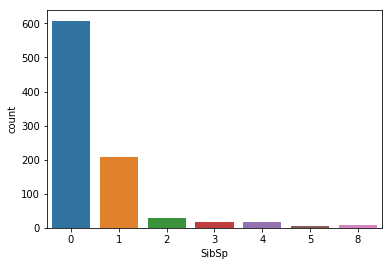

In [73]:
sns.countplot(x='SibSp', data=train_data)

In [74]:
#most people are without any sibings

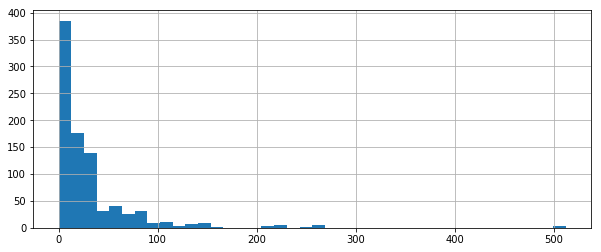

In [75]:
train_data['Fare'].hist(bins=40, figsize=(10,4))

In [76]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

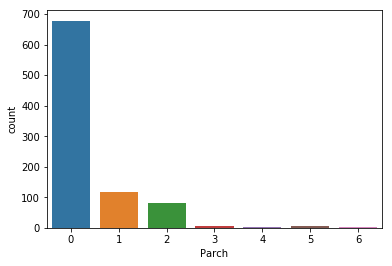

In [77]:
sns.countplot(train_data['Parch'])

In [78]:
# We have gone through each columns and gain insights about the dataset

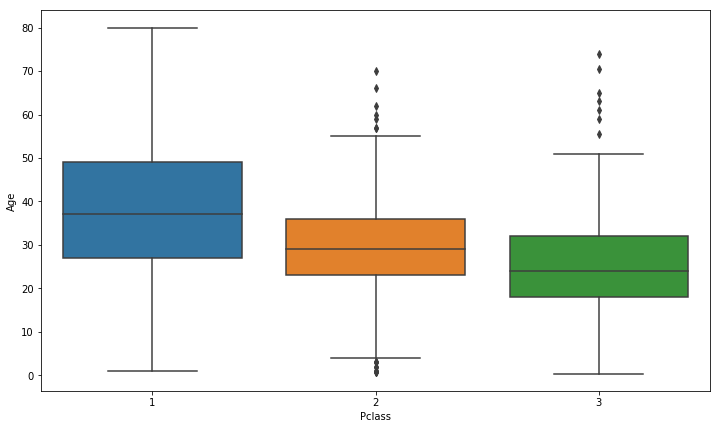

In [79]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [80]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [81]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age, axis=1)

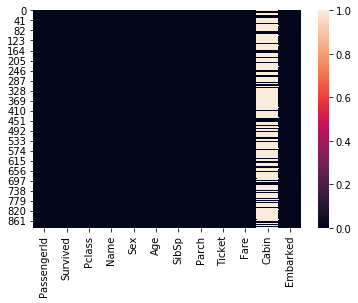

In [82]:
sns.heatmap(train_data.isnull())

In [83]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
train = train_data.copy()

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [90]:
sex = pd.get_dummies(train_data['Sex'], prefix='_',drop_first=True)
pclass = pd.get_dummies(train_data['Pclass'], prefix='_',drop_first=True)


In [94]:
train_data = pd.concat([train_data,sex,pclass], axis=1)

In [98]:
train_data.drop(['Sex','Name','PassengerId','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [100]:
train_data.drop('Pclass', inplace=True,axis=1)

In [101]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,__male,__2,__3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [102]:
from sklearn.model_selection import train_test_split

In [106]:
X = train_data.iloc[:,1:].values
y = train_data.iloc[:,0].values


In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
y_pred = lreg.predict(X_test)

In [111]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [112]:
conf_mat = confusion_matrix(y_test,y_pred)

In [113]:
conf_mat

array([[146,  22],
       [ 33,  67]], dtype=int64)

In [114]:
lreg.score(X_train,y_train)

0.8057784911717496

In [115]:
lreg.score(X_test,y_test)

0.79477611940298509

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
acc = cross_val_score(estimator=lreg, X=X_train, y= y_train, cv=10)

In [118]:
acc

array([ 0.765625  ,  0.80952381,  0.79032258,  0.77419355,  0.79032258,
        0.80645161,  0.80645161,  0.82258065,  0.85483871,  0.82258065])

In [119]:
acc.mean()

0.80428907450076803

# Model Accuract 80%